# <font color = 'violet'>Laboratorio 1

### Exercise 01.1

    

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

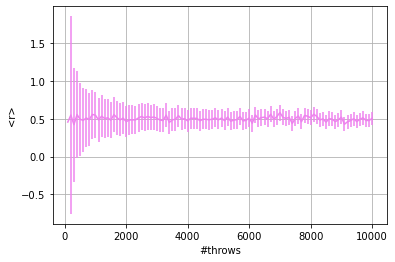

In [6]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



#inizio a costruire il grafico dei valori medi
x, f, error = np.loadtxt("Dati.dat", usecols=(0,1,2), delimiter=None, unpack='true')
plt.errorbar(x,f ,yerr=error,color ='violet')
plt.xlabel('#throws')
plt.ylabel('<r>')
plt.grid(True)

plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).